#   Project of AutoInland Vehicle Insurance Claim Challenge

### Understand The Problem Statement

    -AutoInland is an insurance company in west Africa with a focus on Auto Insurance.
    -In insurance sector, there are very few points of contact between customers and the insurance provider.
    -That’s why, AutoInland needs to make every point of contact count by including filing and settlement of claims.
    -The company believes that, there is a need of understanding future demands in terms of claims request volume in order to achieve better service level standards.

### Type of the Problem

It is a classification problem where we have to predict whether customers are most likely to submit claims in the next four months or not.

### Hypothesis Generation

The factors which can affect the chance for a customer to to submit claims.

- Female are more likely to submit claims
- Older customers are more likely to submits their claims
- Customers who own Car Classic are more likely to submits their claims
- Customers who own Hyundai are more likely to submits their claims
- Customers who own Saloon are more likely to submits their claims
- Customers who own White car are more likely to submits their claims
- Customers with one policy are more likely to submits their claims




In [66]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt


In [67]:
data = pd.read_csv('Train.csv')

In [68]:
data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [69]:
data.shape

(12079, 14)

In [70]:
list(data.columns)

['ID',
 'Policy Start Date',
 'Policy End Date',
 'Gender',
 'Age',
 'First Transaction Date',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName',
 'target']

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [72]:
data.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

In [73]:
data['Age_round'] = np.array(np.floor(np.array(data['Age']) /10).astype('int64'))
data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Age_round
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0,3
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1,7
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0,4
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1,2


## HANDLING MISSING VALUES

In [74]:
data['Gender'].fillna(method = 'ffill', inplace = True)
data['Car_Category'].fillna(method = 'bfill', inplace = True)
data['Subject_Car_Colour'].fillna(method = 'ffill', inplace = True)
data['Subject_Car_Make'].fillna(method = 'bfill', inplace = True)
data['LGA_Name'].fillna(method = 'ffill', inplace = True)
data['State'].fillna(method = 'bfill', inplace = True)
data['LGA_Name'].fillna(method = 'bfill', inplace = True)

In [75]:
data.isna().sum()

ID                        0
Policy Start Date         0
Policy End Date           0
Gender                    0
Age                       0
First Transaction Date    0
No_Pol                    0
Car_Category              0
Subject_Car_Colour        0
Subject_Car_Make          0
LGA_Name                  0
State                     0
ProductName               0
target                    0
Age_round                 0
dtype: int64

## UNIVARIATE ANALYSIS

Exploring features individually using pandas_profilling

#### PANDAS PROFILING

In [76]:
#data_report = pandas_profiling.ProfileReport(data)
#data_report

### MANUAL

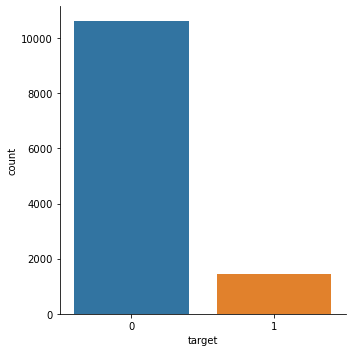

In [77]:
plot = sns.catplot(x="target", kind="count", data= data)


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Male'),
  Text(1, 0, 'Female'),
  Text(2, 0, 'Entity'),
  Text(3, 0, 'Joint Gender'),
  Text(4, 0, 'NO GENDER'),
  Text(5, 0, 'NOT STATED'),
  Text(6, 0, 'SEX')])

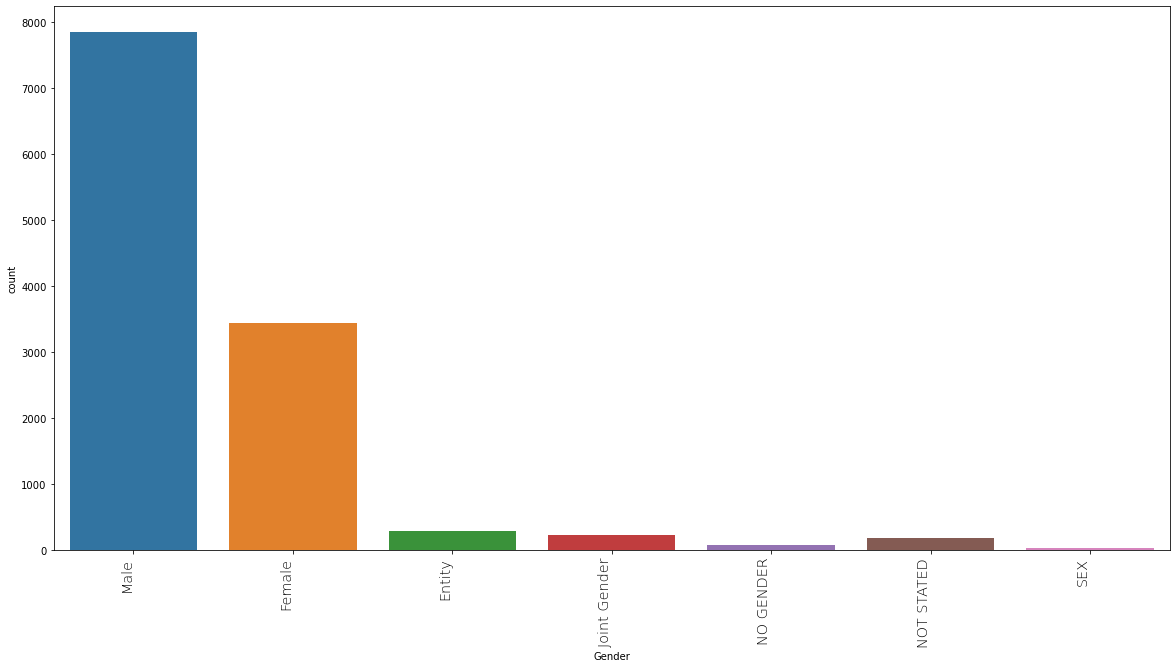

In [78]:

plt.figure(figsize=(20,10))
sns.countplot(data.Gender)
plt.xticks(rotation = 90,
        horizontalalignment='right',
        fontweight=20,
        fontsize='x-large')



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '-610'),
  Text(1, 0, '-594'),
  Text(2, 0, '-8'),
  Text(3, 0, '-6'),
  Text(4, 0, '-3'),
  Text(5, 0, '-2'),
  Text(6, 0, '-1'),
  Text(7, 0, '0'),
  Text(8, 0, '1'),
  Text(9, 0, '2'),
  Text(10, 0, '3'),
  Text(11, 0, '4'),
  Text(12, 0, '5'),
  Text(13, 0, '6'),
  Text(14, 0, '7'),
  Text(15, 0, '8'),
  Text(16, 0, '9'),
  Text(17, 0, '10'),
  Text(18, 0, '11'),
  Text(19, 0, '12'),
  Text(20, 0, '13'),
  Text(21, 0, '14'),
  Text(22, 0, '32')])

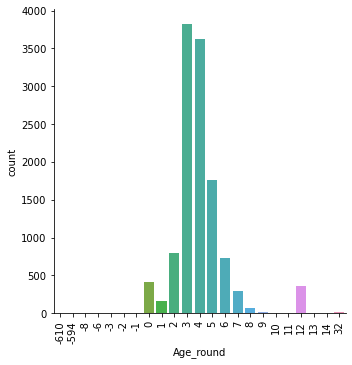

In [79]:
sns.catplot(x="Age_round", kind="count", data= data)
plt.xticks(rotation = 90)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Saloon'),
  Text(1, 0, 'JEEP'),
  Text(2, 0, 'Motorcycle'),
  Text(3, 0, 'Truck'),
  Text(4, 0, 'Bus'),
  Text(5, 0, 'Mini Bus'),
  Text(6, 0, 'Pick Up'),
  Text(7, 0, 'Mini Van'),
  Text(8, 0, 'Van'),
  Text(9, 0, 'Pick Up > 3 Tons'),
  Text(10, 0, 'CAMRY CAR HIRE'),
  Text(11, 0, 'Wagon'),
  Text(12, 0, 'Shape Of Vehicle Chasis'),
  Text(13, 0, 'Sedan'),
  Text(14, 0, 'Station 4 Wheel'),
  Text(15, 0, 'Tipper Truck')])

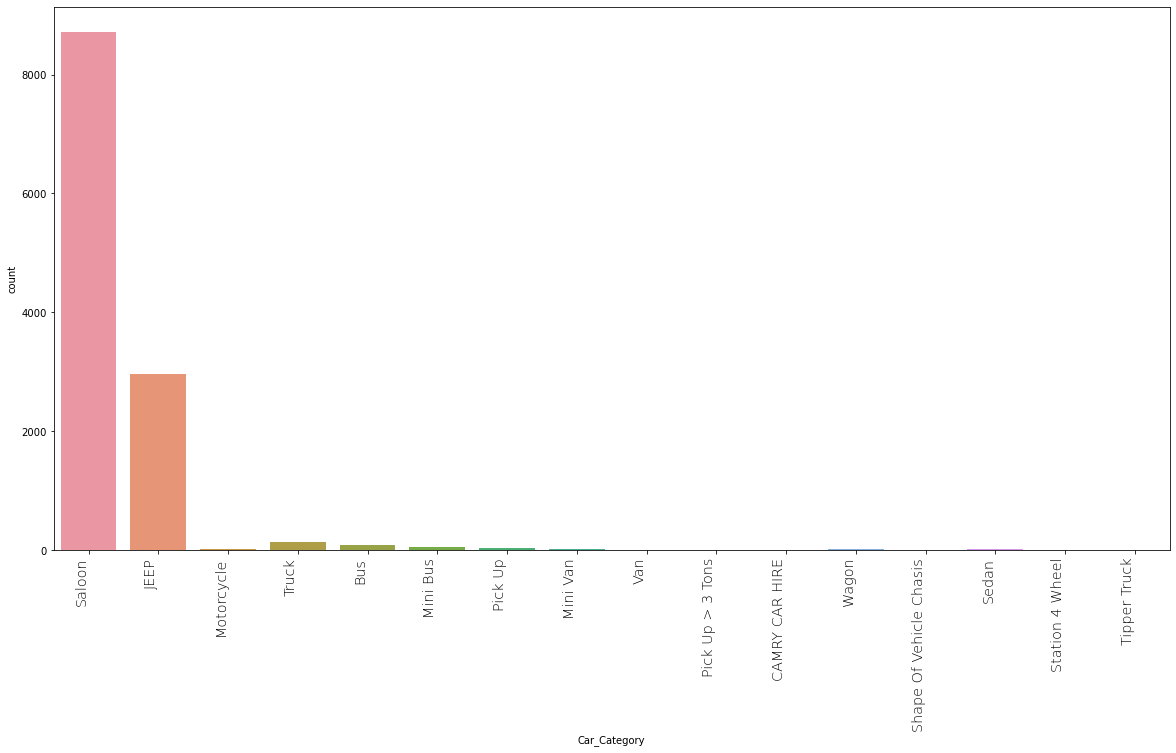

In [80]:
plt.figure(figsize=(20,10))
sns.countplot(data.Car_Category)
plt.xticks(rotation = 90,
        horizontalalignment='right',
        fontweight=20,
        fontsize='x-large')



/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'Grey'),
  Text(2, 0, 'Red'),
  Text(3, 0, 'As Attached'),
  Text(4, 0, 'Blue'),
  Text(5, 0, 'Silver'),
  Text(6, 0, 'Green'),
  Text(7, 0, 'Ash'),
  Text(8, 0, 'White'),
  Text(9, 0, 'Gray & Gray'),
  Text(10, 0, 'Wine'),
  Text(11, 0, 'Brown'),
  Text(12, 0, 'Red & Blue'),
  Text(13, 0, 'Gold'),
  Text(14, 0, 'Gray & Silver'),
  Text(15, 0, 'Orange'),
  Text(16, 0, 'Red & Black'),
  Text(17, 0, 'Dark Grey'),
  Text(18, 0, 'White & Red'),
  Text(19, 0, 'Light Green'),
  Text(20, 0, 'Dark Gray'),
  Text(21, 0, 'B.Silver'),
  Text(22, 0, 'Purple'),
  Text(23, 0, 'Blue & Red'),
  Text(24, 0, 'Red & Yellow'),
  Text(25, 0, 'Yellow'),
  Text(26, 0, 'Red & White'),
  Text(27, 0, 'D. Red'),
  Text(28, 0, 'Dark Red'),
  Text(29, 0, 'Black & White'),
  Te

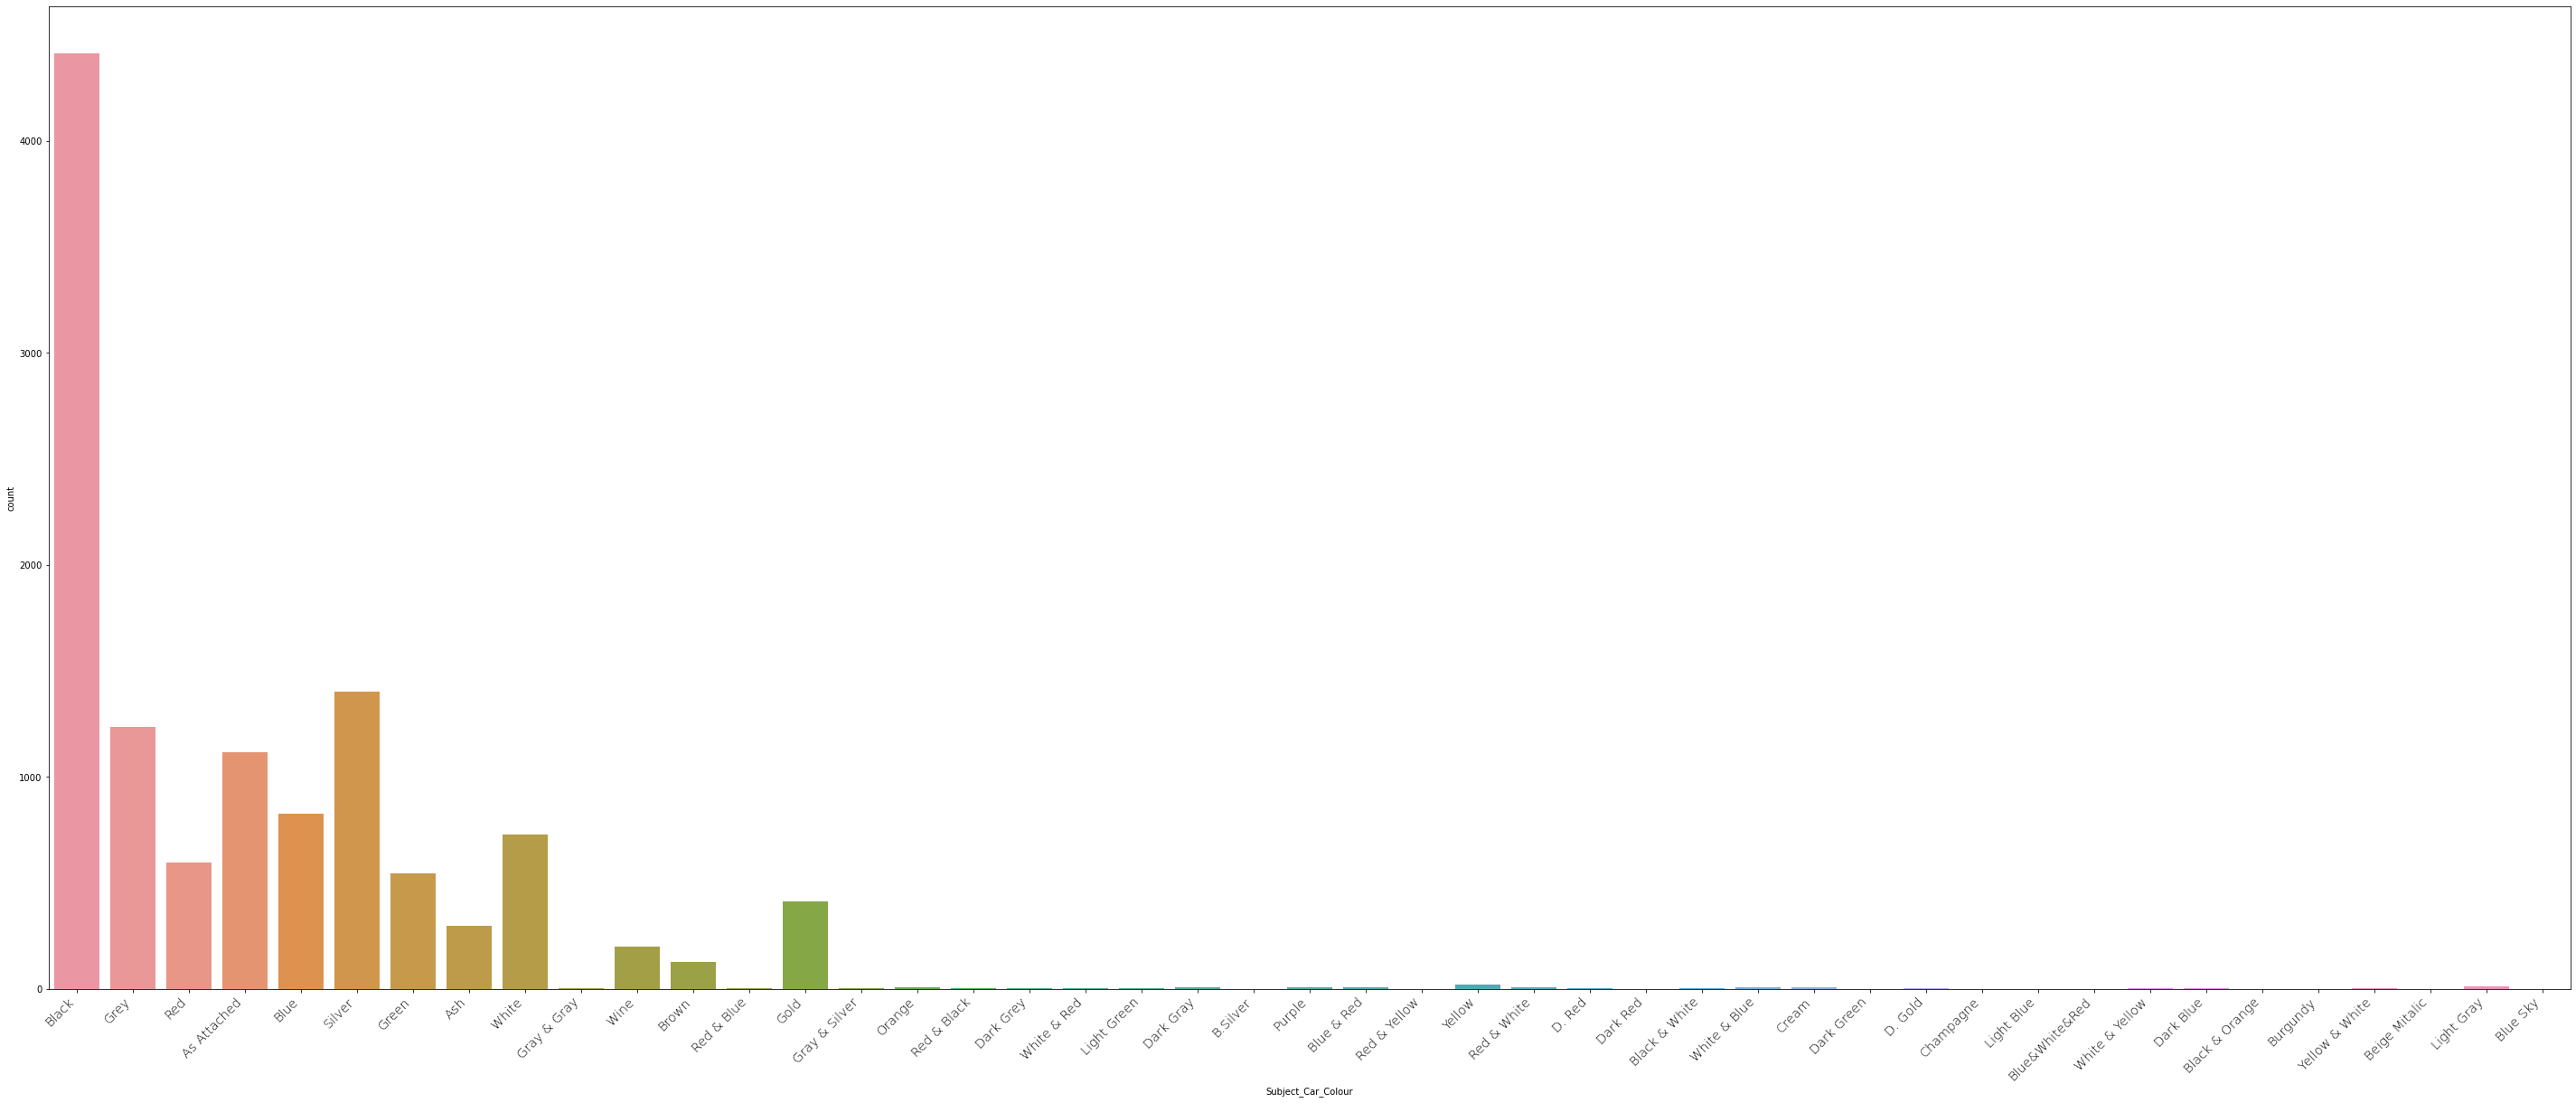

In [81]:
plt.figure(figsize=(50,20))
sns.countplot(data.Subject_Car_Colour)
plt.xticks(rotation = 45,
        horizontalalignment='right',
        fontweight=50,
        fontsize='x-large')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]),
 [Text(0, 0, 'TOYOTA'),
  Text(1, 0, 'REXTON'),
  Text(2, 0, 'Lexus'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Iveco'),
  Text(5, 0, 'DAF'),
  Text(6, 0, 'Honda'),
  Text(7, 0, 'Mercedes'),
  Text(8, 0, 'Jincheng'),
  Text(9, 0, 'ACURA'),
  Text(10, 0, 'Ford'),
  Text(11, 0, 'Volkswagen'),
  Text(12, 0, 'Nissan'),
  Text(13, 0, '.'),
  Text(14, 0, 'Pontiac'),
  Text(15, 0, 'Range Rover'),
  Text(16, 0, 'Kia'),
  Text(17, 0, 'Mitsubishi'),
  Text(18, 0, 'Scania'),
  Text(19, 0, 'BMW'),
  Text(20, 0, 'Infiniti'),
  Text(21, 0, 'Renault'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'Hummer'),
  Text(24, 0, 'Mack'),
  Text(25, 0, 'Grand Cherokee'),
  Text(26, 0, '

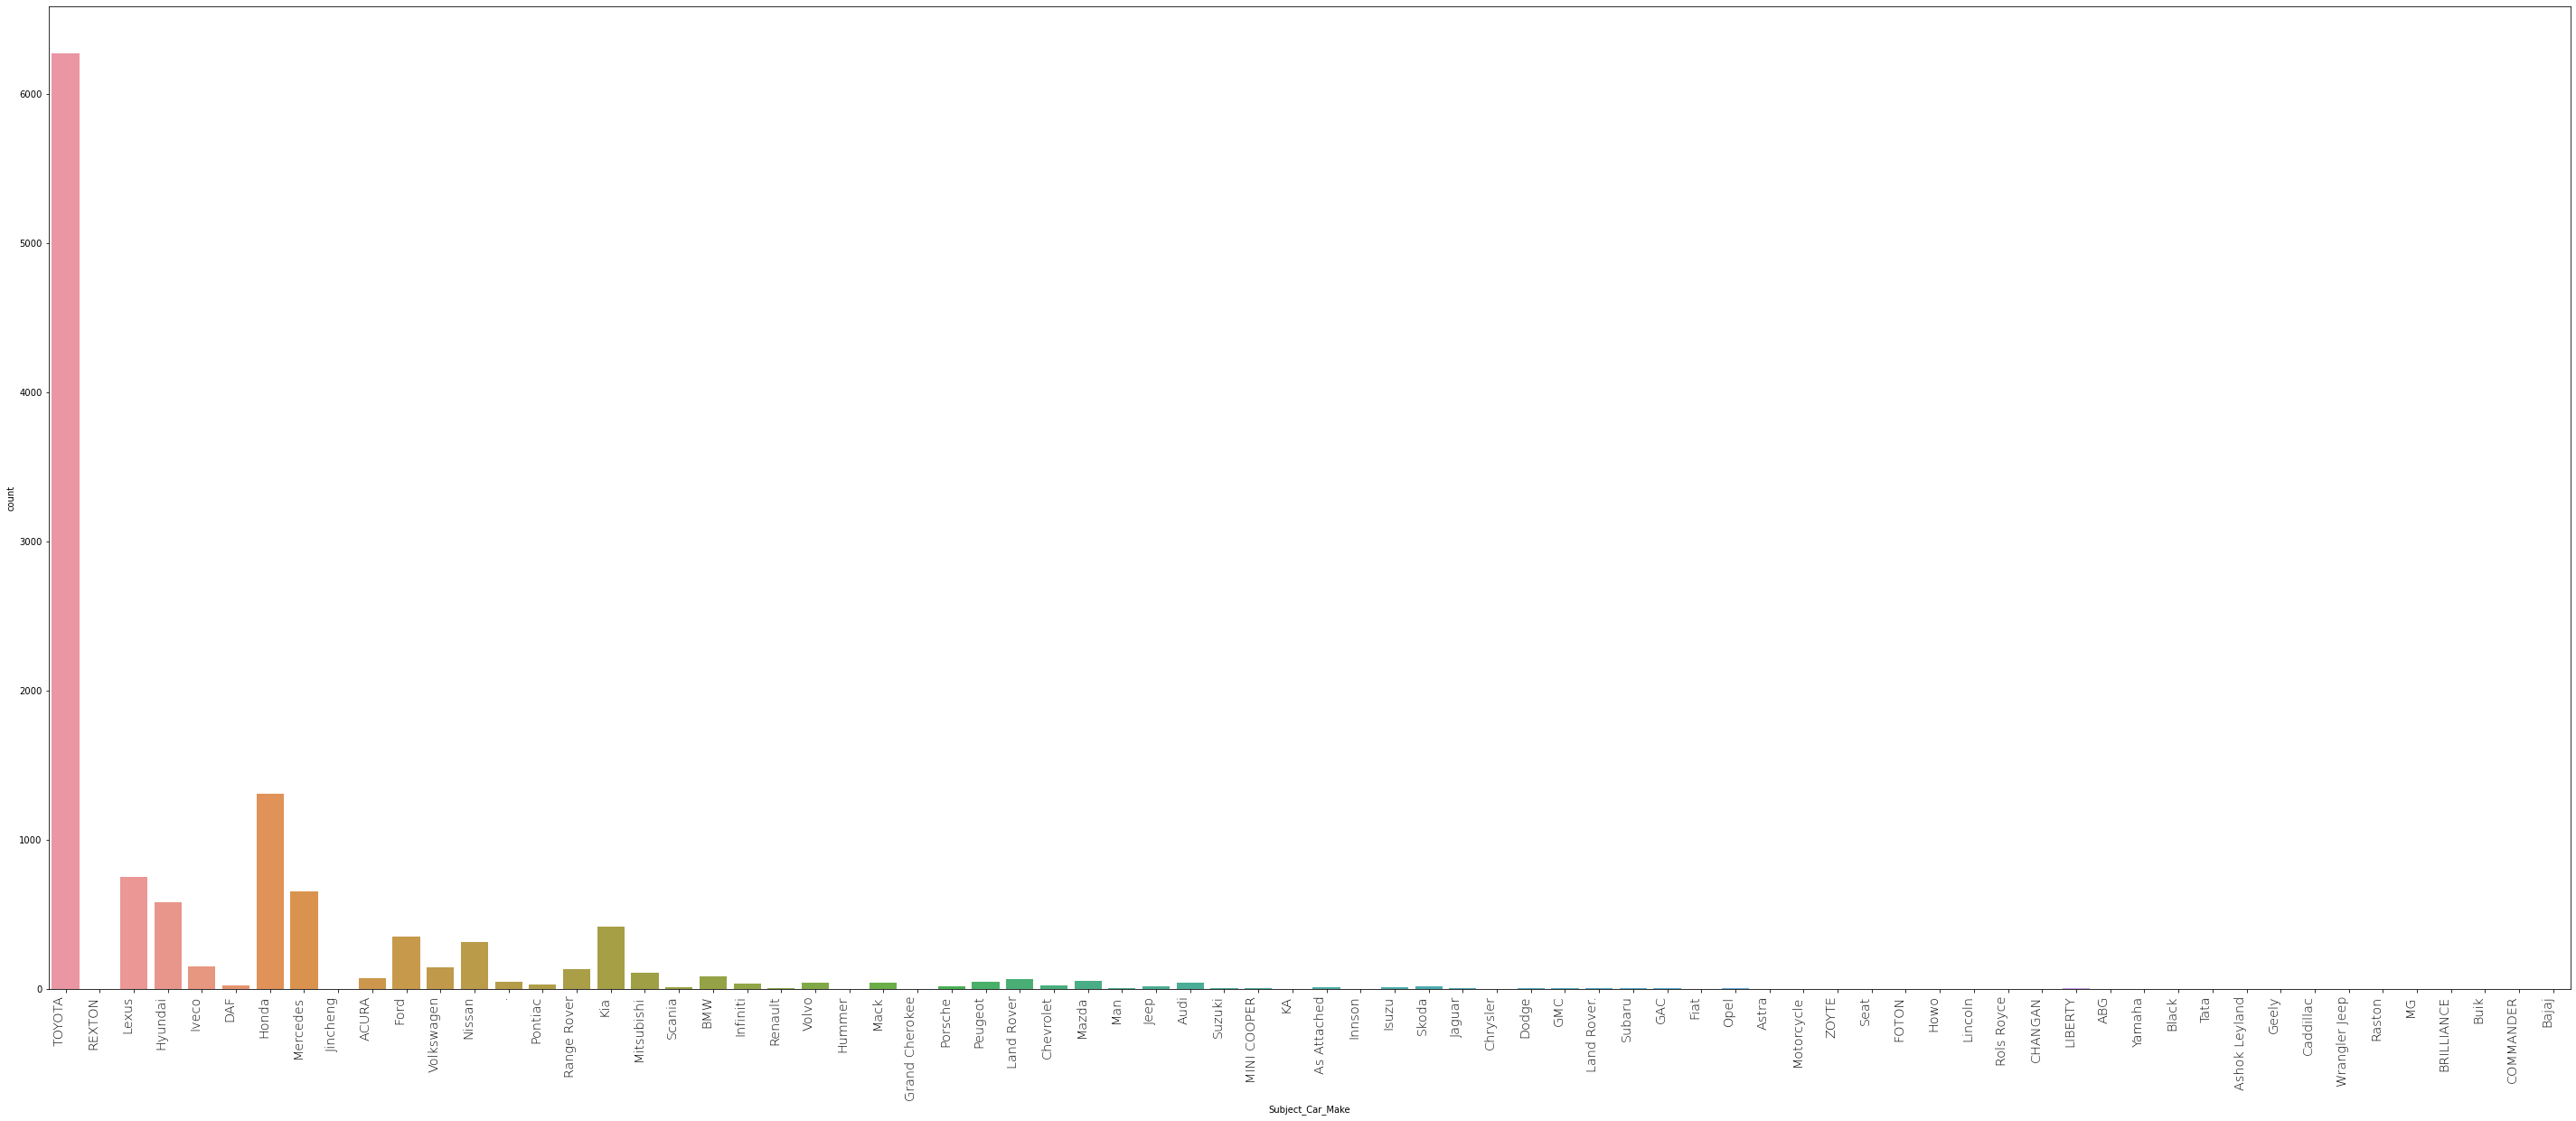

In [82]:
plt.figure(figsize=(50,20))
sns.countplot(data.Subject_Car_Make)
plt.xticks(rotation = 90,
        horizontalalignment='right',
        fontweight=20,
        fontsize='x-large')



/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Car Classic'),
  Text(1, 0, 'CarSafe'),
  Text(2, 0, 'Muuve'),
  Text(3, 0, 'CVTP'),
  Text(4, 0, 'Car Plus'),
  Text(5, 0, 'Motor Cycle'),
  Text(6, 0, 'Customized Motor'),
  Text(7, 0, 'CarFlex'),
  Text(8, 0, 'Car Vintage')])

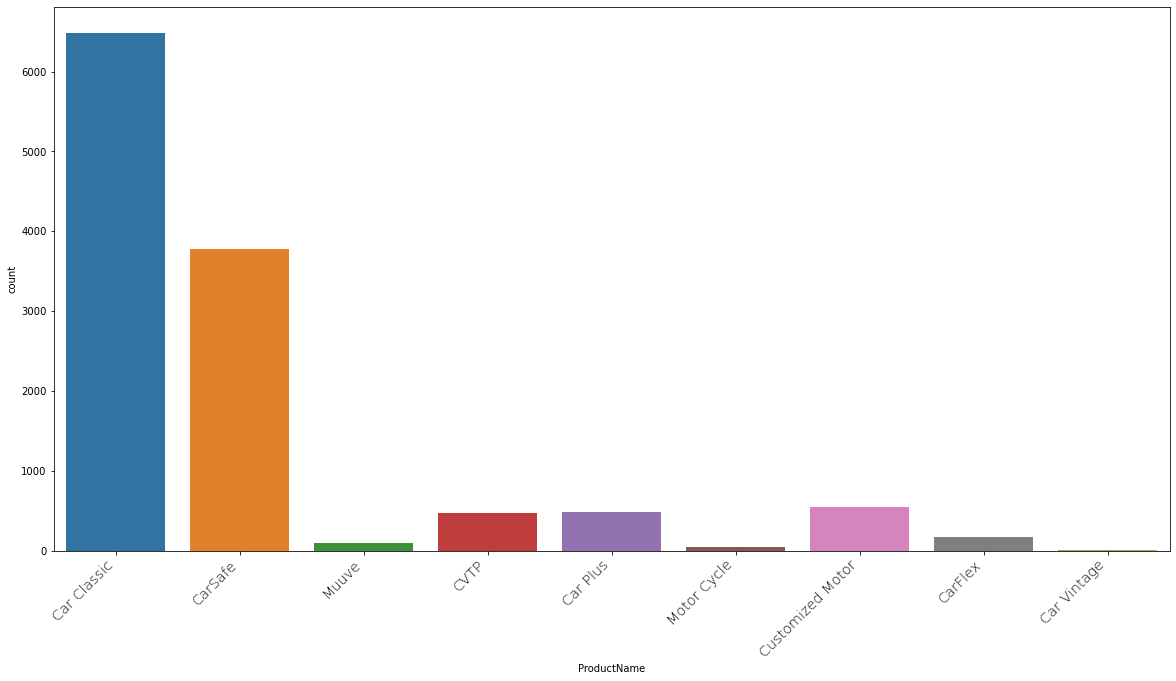

In [83]:
plt.figure(figsize=(20,10))
sns.countplot(data.ProductName)
plt.xticks(rotation = 45,
        horizontalalignment='right',
        fontweight=50,
        fontsize='x-large')



/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110]),
 [Text(0, 0, 'Lagos'),
  Text(1, 0, 'Benue'),
  Text(2, 0, 'Eti-Osa'),
  Text(3, 0, 'Delta'),
  Text(4, 0, 'Ogun'),
  Text(5, 0, 'Abuja-Municipal'),
  Text(6, 0, 'Oshodi-Isolo'),
  Text(7, 0, 'Ibeju-Lekki'),
  Text(8, 0, 'Ibadan-West'),
  Text(9, 0, 'Obia-Akpor'),
  Text(10, 0, 'Ibadan-East'),
  Text(11, 0, 'Kaduna-South'),
  Text(12, 0, 'Amuwo-Odofin'),
  Text(13, 0, 

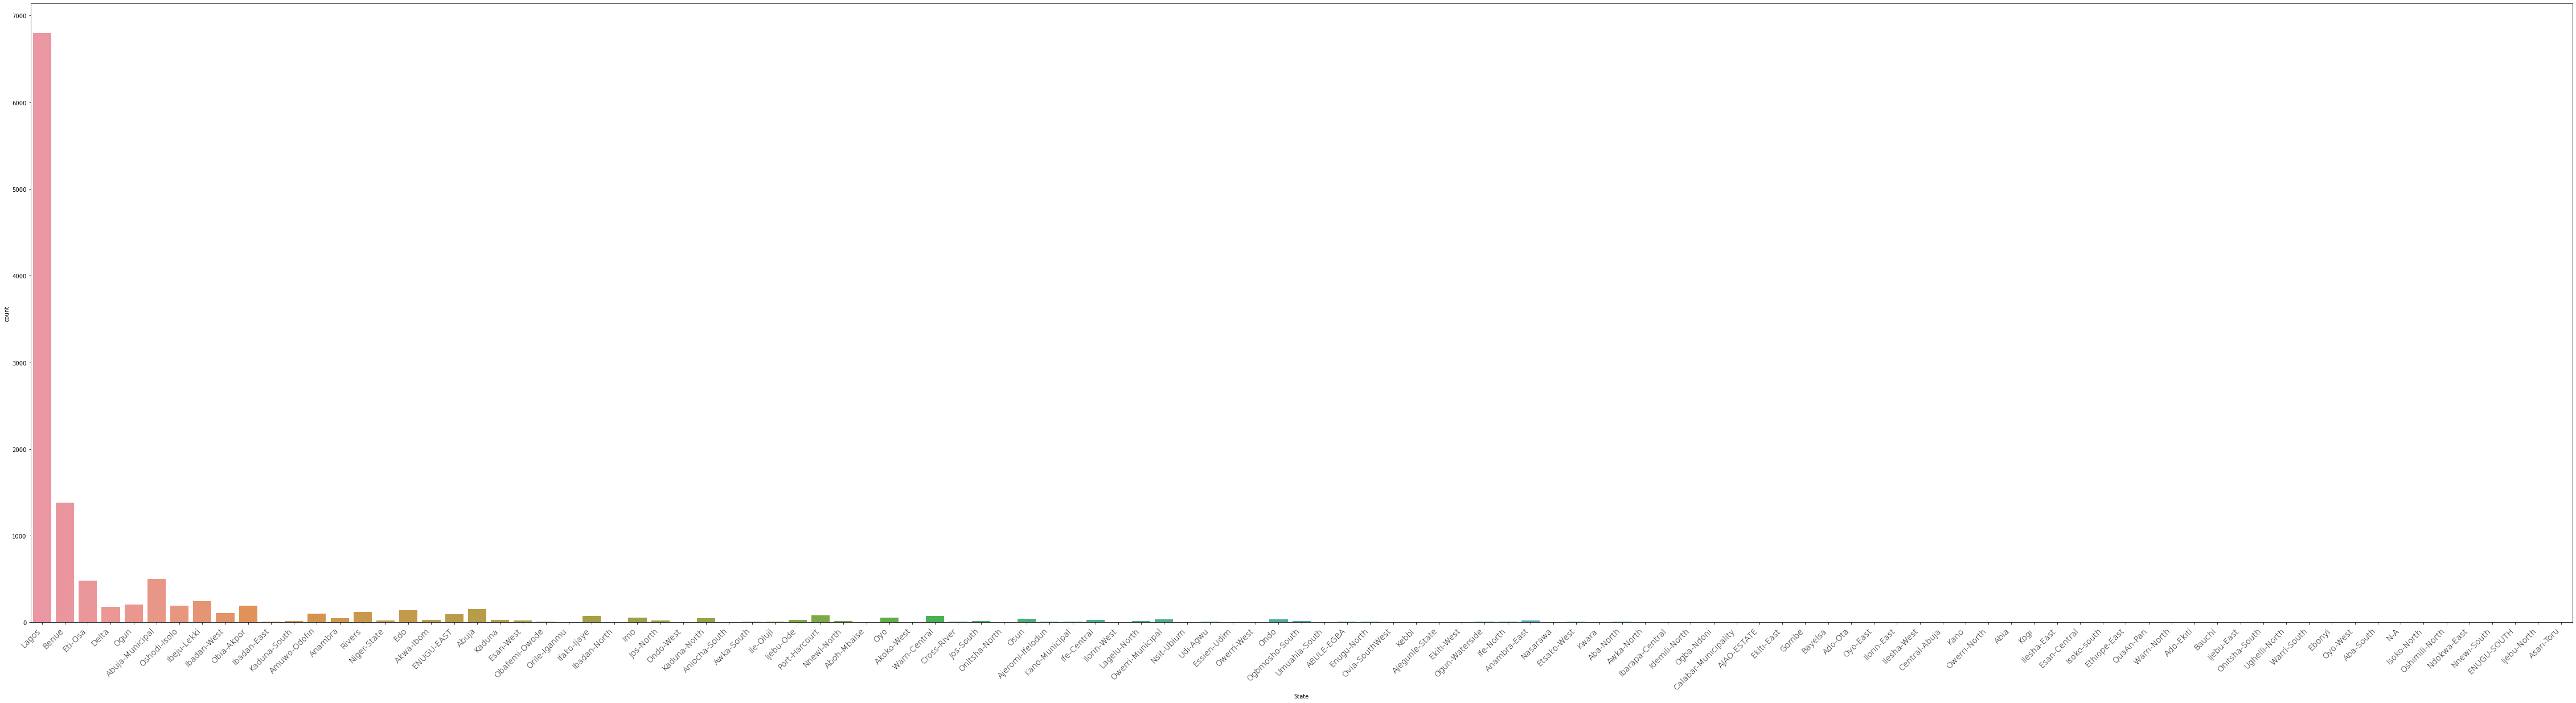

In [84]:
plt.figure(figsize=(80,20))
sns.countplot(data.State)
plt.xticks(rotation = 45,
        horizontalalignment='right',
        fontweight=70,
        fontsize='x-large')



/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '10')])

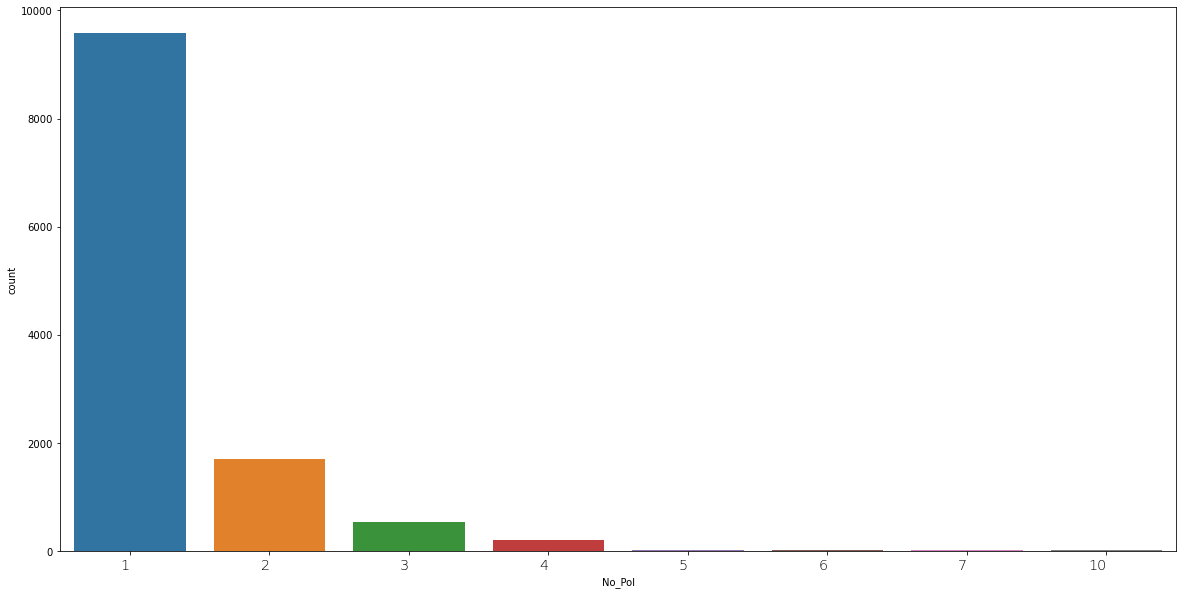

In [85]:
"""plt.figure(figsize=(16, 6))
data.No_Pol.hist() 
plt.xlabel('No_Pol')

"""

plt.figure(figsize=(20,10))
sns.countplot(data.No_Pol)
plt.xticks(
        horizontalalignment='right',
        fontweight=50,
        fontsize='x-large')



### BIVARIATE ANALYSIS

Exploring all features with respect to the target features

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


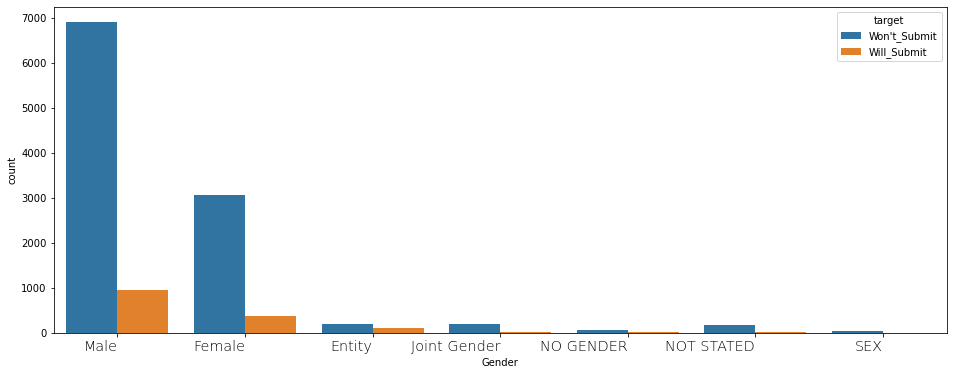

In [86]:

plt.figure(figsize=(16, 6))
sns.countplot('Gender', hue ='target', data = data)
plt.xticks( 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

plt.legend(
        ["Won't_Submit","Will_Submit"],
        loc = 1,
        title='target',
        )

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


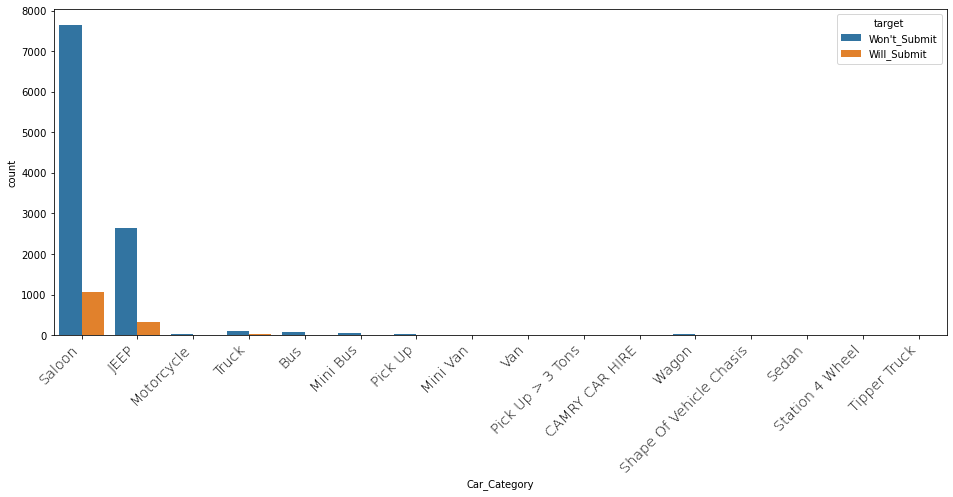

In [87]:
plt.figure(figsize=(16, 6))
sns.countplot('Car_Category', hue ='target', data = data)
plt.xticks( 
    rotation = 45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

plt.legend(
        ["Won't_Submit","Will_Submit"],
        loc = 1,
        title='target',
        )

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


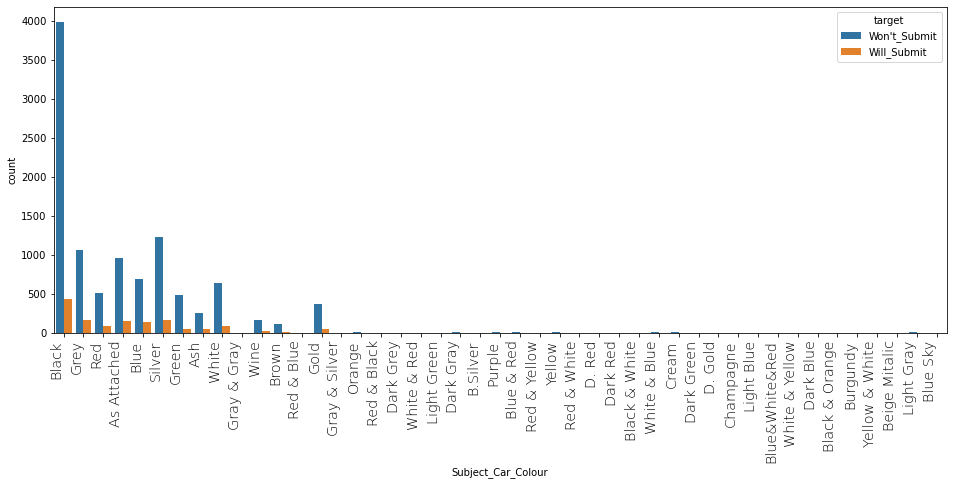

In [88]:
plt.figure(figsize=(16, 6))
sns.countplot('Subject_Car_Colour', hue ='target', data = data)
plt.xticks(
    rotation = 90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

plt.legend(
        ["Won't_Submit","Will_Submit"],
        loc = 1,
        title='target',
        )

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


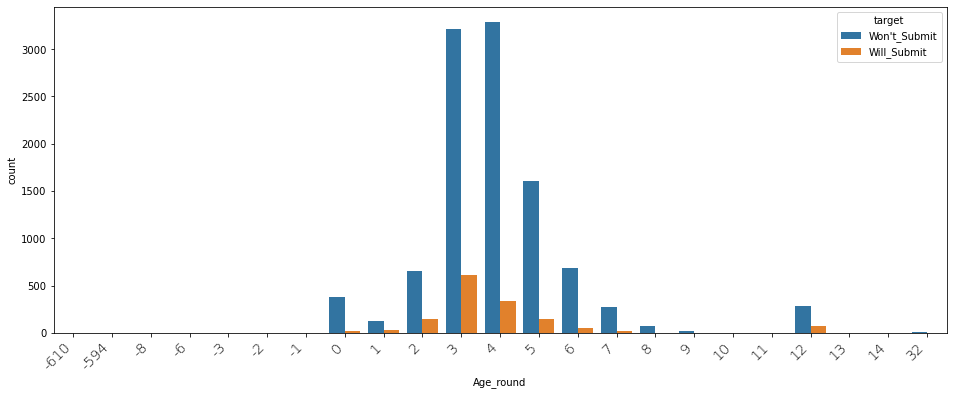

In [89]:
plt.figure(figsize=(16, 6))
sns.countplot('Age_round', hue ='target', data = data)
plt.xticks(
    rotation = 45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

plt.legend(
        ["Won't_Submit","Will_Submit"],
        loc = 1,
        title='target',

        )

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


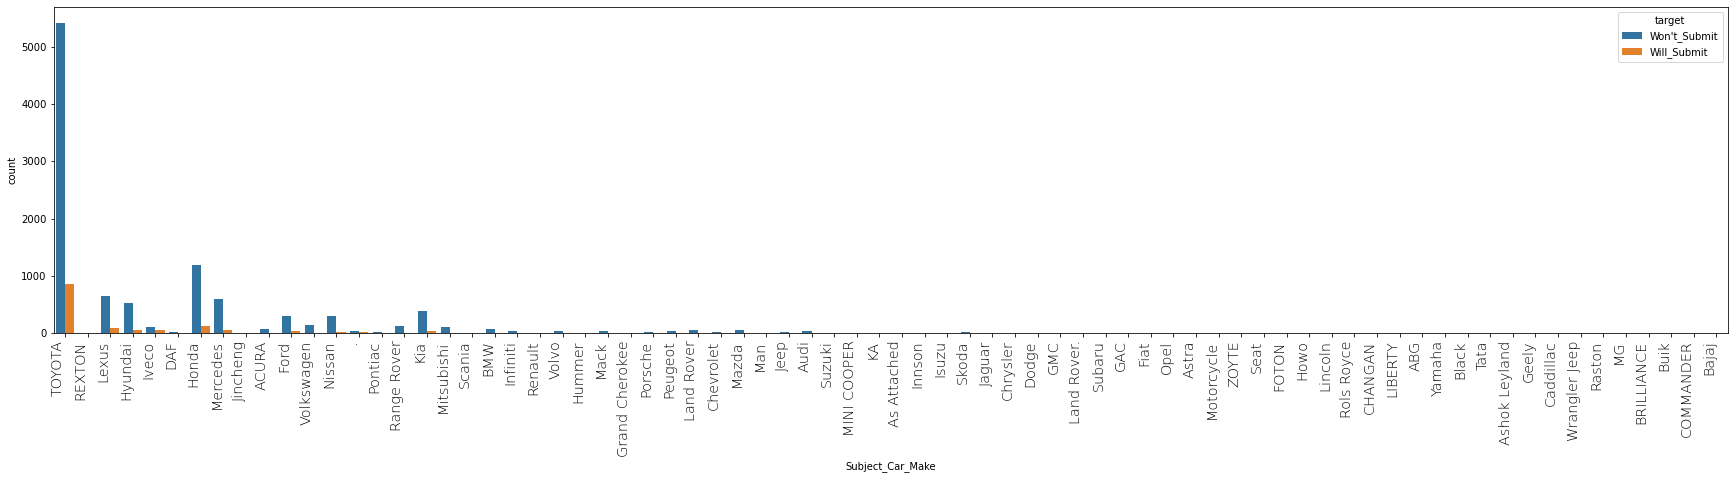

In [90]:
plt.figure(figsize=(30, 6))
sns.countplot('Subject_Car_Make', hue ='target', data = data)
plt.xticks( 
    rotation = 90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.legend(
        ["Won't_Submit","Will_Submit"],
        loc = 1,
        title='target',
        )
        

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


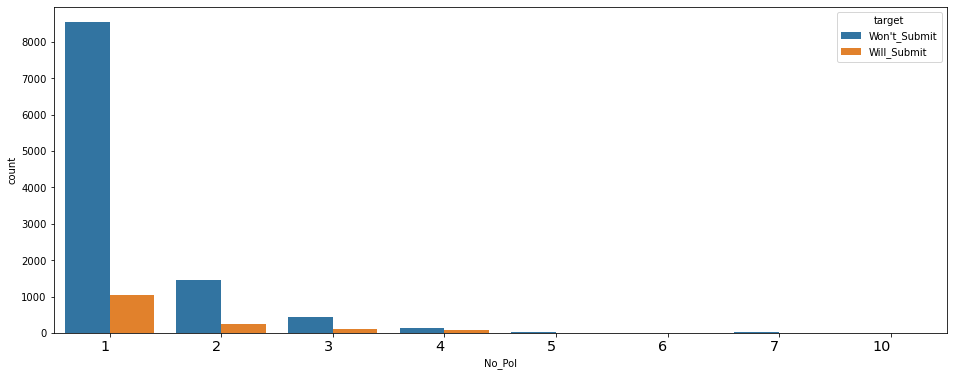

In [91]:
plt.figure(figsize=(16, 6))
sns.countplot('No_Pol', hue ='target', data = data)
plt.xticks( 
    #rotation = 90,
    horizontalalignment='right',
    #fontweight='light',
    fontsize='x-large')

plt.legend(
        ["Won't_Submit","Will_Submit"],
        loc = 1,
        title='target',
        )



/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


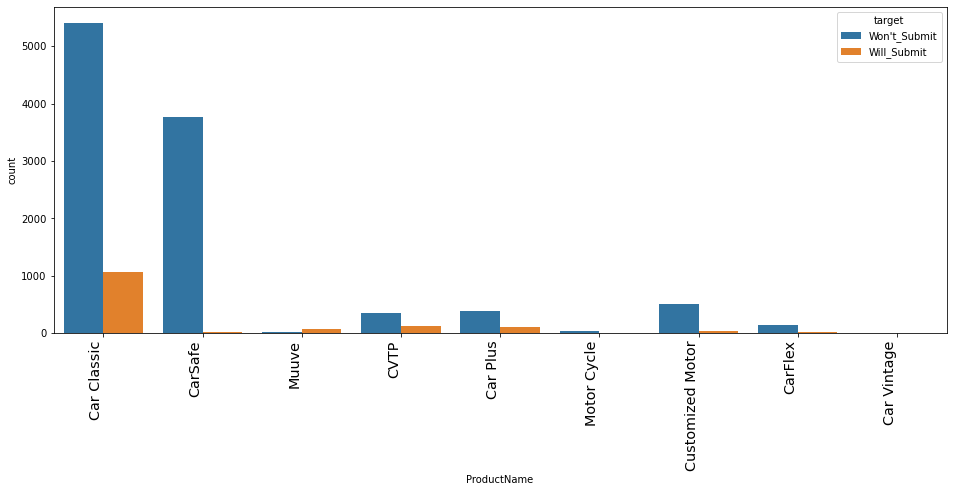

In [92]:
plt.figure(figsize=(16, 6))
sns.countplot('ProductName', hue ='target', data = data)
plt.xticks( 
    rotation = 90,
    horizontalalignment='right',
    #fontweight='light',
    fontsize='x-large')

plt.legend(
        ["Won't_Submit","Will_Submit"],
        loc = 1,
        title='target',
        )

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


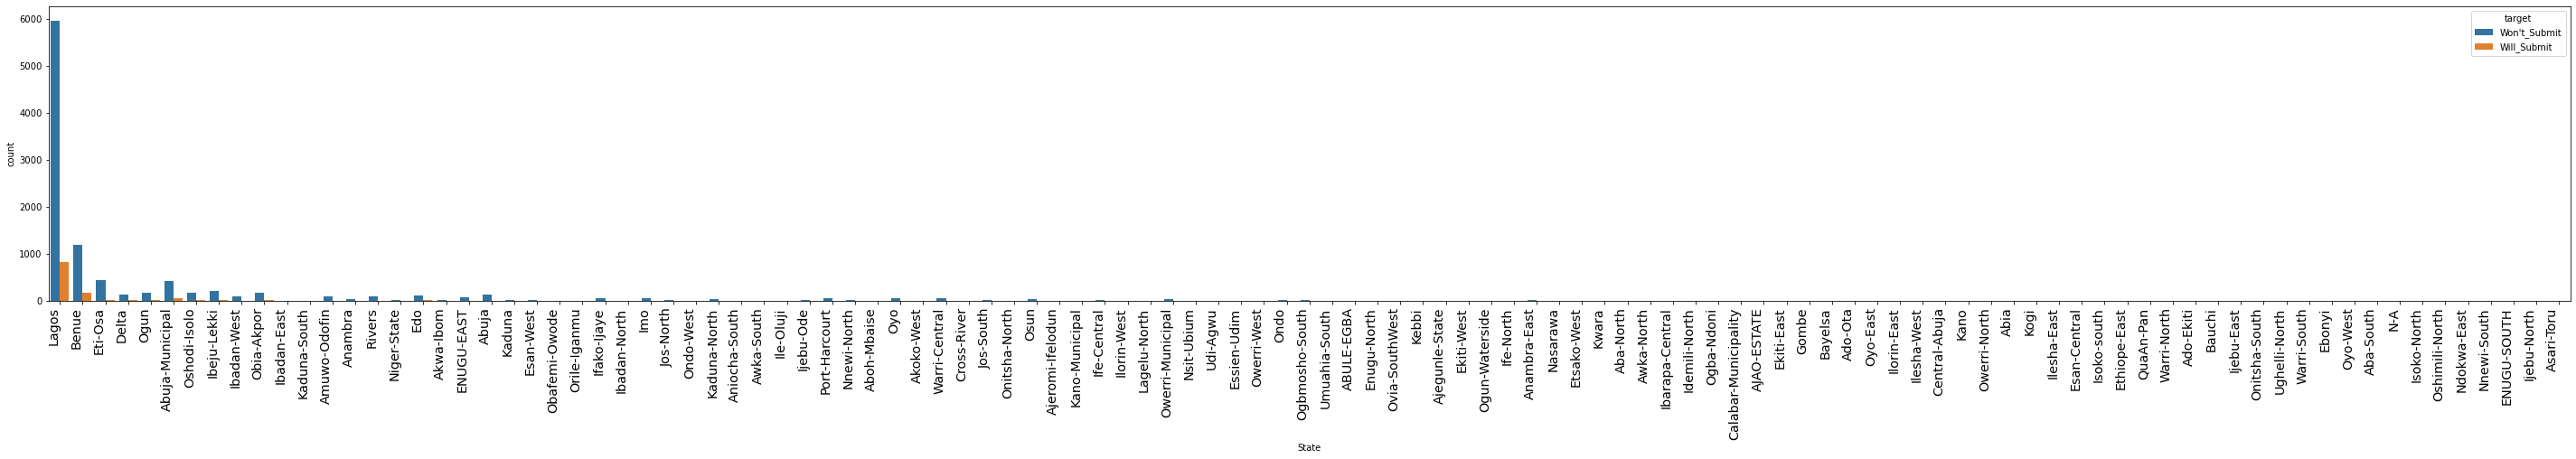

In [93]:
plt.figure(figsize=(50, 6))
sns.countplot('State', hue ='target', data = data)
plt.xticks( 
    rotation = 90,
    horizontalalignment='right',
    #fontweight='light',
    fontsize='x-large')

    
plt.legend(
        ["Won't_Submit","Will_Submit"],
        loc = 1,
        title='target',
        )

### HYPOTHESIS TESTING

- Female are more likely to submit claims - TRUE
- Older customers are more likely to submits their claims - FALSE
- Customers who own Car Classic are more likely to submits their claims - TRUE
- Customers who own Hyundai are more likely to submits their claims - FALSE
- Customers who own Saloon are more likely to submits their claims - TRUE
- Customers who own White car are more likely to submits their claims - FALSE
- Customers with one policy are more likely to submits their claims - FALSE
